In [1]:
from pathlib import Path
from typing import List, Tuple, Dict

# Wav Features and Visualization
import librosa
# Basics
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Machine Learning
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# View Data

In [3]:
import os
general_path = 'C:/Users/user/Desktop/MLInProd/dz1/dz1/data/raw/train'
print(list(os.listdir(f'{general_path}')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [ ]:
y, sr = librosa.load(f'{general_path}/train/reggae/1007785311312304036.wav')

In [ ]:
print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

y: [-0.00219727 -0.00177002  0.00320435 ...  0.03689575  0.03677368
  0.03598022] 

y shape: (132300,) 

Sample Rate (KHz): 22050 



In [ ]:
audio_file, _ = librosa.effects.trim(y)

print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [-0.00219727 -0.00177002  0.00320435 ...  0.03689575  0.03677368
  0.03598022] 

Audio File shape: (132300,)


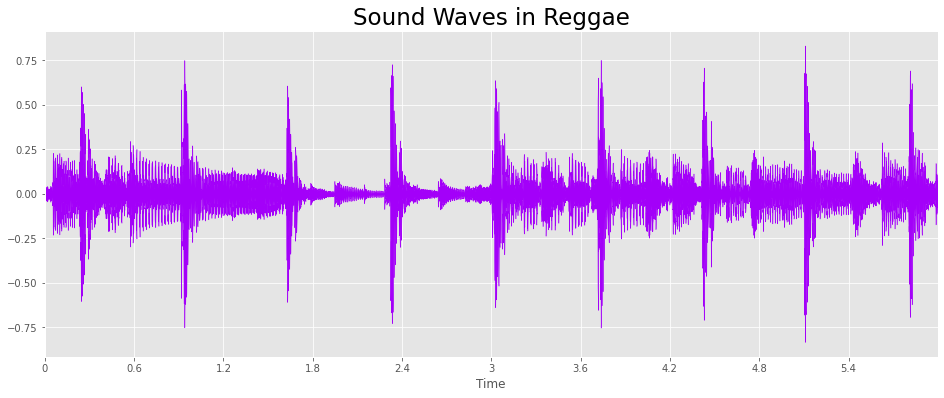

In [ ]:
import librosa.display as ld
plt.figure(figsize = (16, 6))
ld.waveplot(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Reggae", fontsize = 23);

In [ ]:
n_fft = 2048 
hop_length = 512 

D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 259)


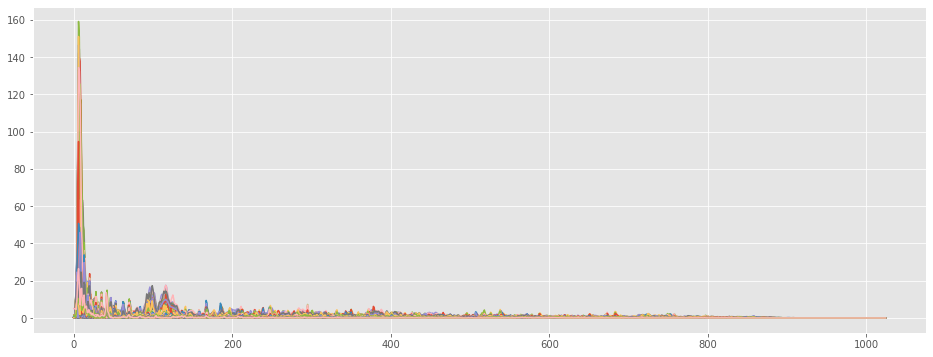

In [ ]:
plt.figure(figsize = (16, 6))
plt.plot(D)

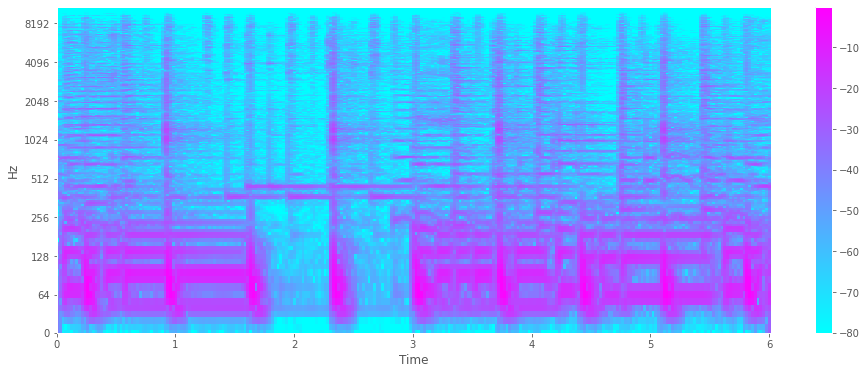

In [ ]:
DB = librosa.amplitude_to_db(D, ref = np.max)

plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

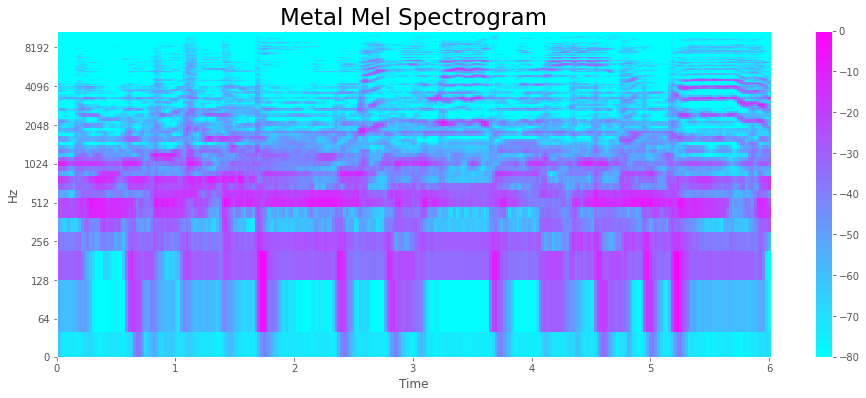

In [ ]:
y, sr = librosa.load(f'{general_path}/train/metal/1007785311312304036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);

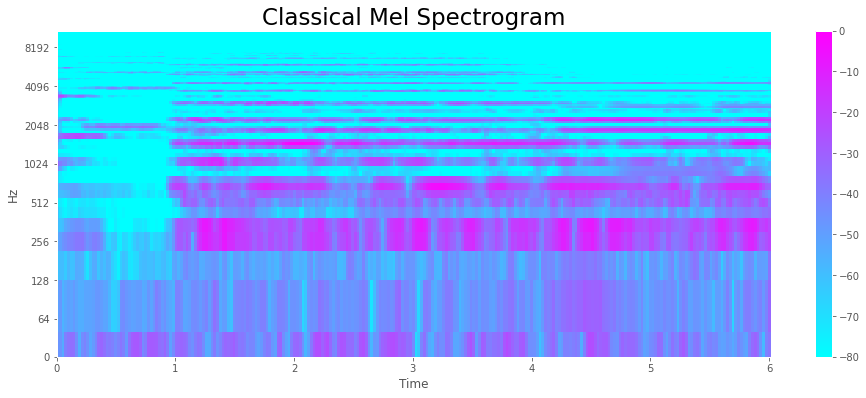

In [ ]:
y, sr = librosa.load(f'{general_path}/train/classical/1007785311312304036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Classical Mel Spectrogram", fontsize = 23);

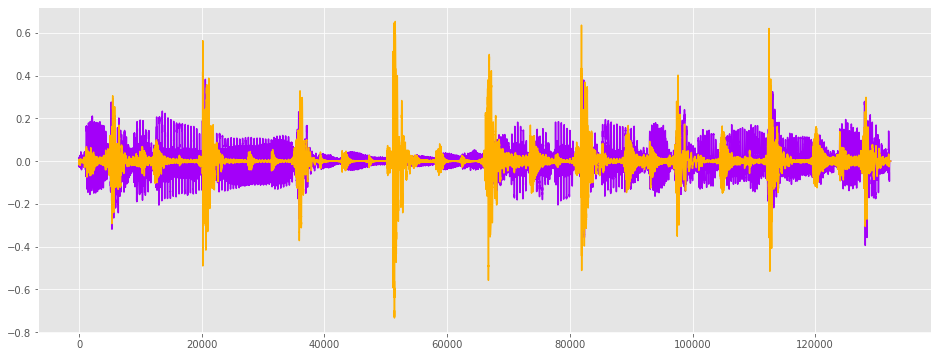

In [ ]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');